In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, PolynomialFeatures, Binarizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# **Modeling Medical Insurance Costs**

## Source

This data was found on kaggle here: https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction?resource=download \
Thanks to Mr. M Rahul Vyas for uploading the dataset to kaggle. \
The data is licensed by MIT.

## **Questions**

1. Which features influence medical costs the most?
2. How accurately machine learning models predict medical insurance charges?

## **Data Cleaning/Missing Values**

Luckily, this data was already cleaned for us. There are also no missing values in our dataset.

In [2]:
insurance_raw = pd.read_csv(r"C:\Users\ritac\Downloads\medical_insurance\medical_insurance.csv")
insurance_raw

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


## **Exploratory Data Analysis**

Here we will do exploratory data analysis, helping us conduct our hypothesis testing and model building better.

### Charges

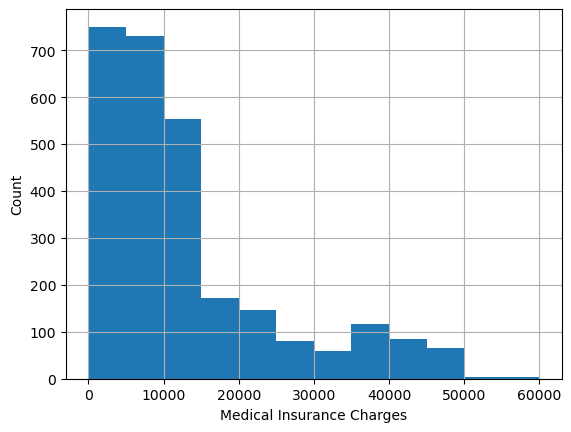

In [3]:
plt.hist(insurance_raw['charges'], bins=np.arange(0, 65000, 5000))
plt.xlabel('Medical Insurance Charges')
plt.ylabel('Count')
plt.grid()
plt.show()

In [4]:
charges_mean = insurance_raw['charges'].mean()
charges_median = insurance_raw['charges'].median()
charges_min = insurance_raw['charges'].min()
charges_max = insurance_raw['charges'].max()

print(f"The mean of the charges is ${charges_mean}")
print(f"The median of the charges is ${charges_median}")
print(f"The smallest charge is ${charges_min}")
print(f"The largest charge is ${charges_max}")

The mean of the charges is $13261.369959046897
The median of the charges is $9333.014350000001
The smallest charge is $1121.8739
The largest charge is $63770.42801


We can see the distribution of the medical insurance charges is skewed right. This is also shown by the fact that the mean > median.

### Age

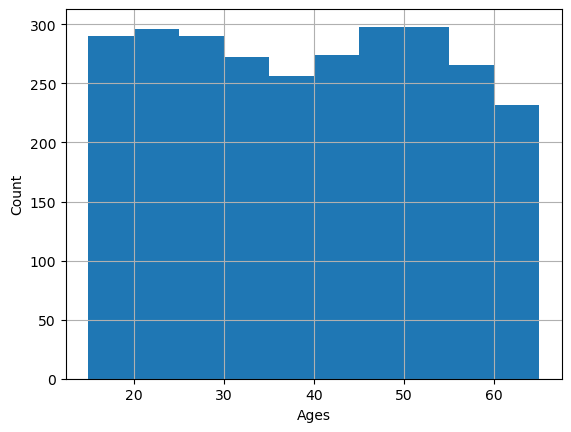

In [5]:
plt.hist(insurance_raw['age'], bins=np.arange(15, 70, 5))
plt.xlabel('Ages')
plt.ylabel('Count')
plt.grid()
plt.show()

We can see that our dataset does not have values for children and most teenagers, or for seniors. It's important to note this as this means our model will only be able to make predictions for people within this age range.

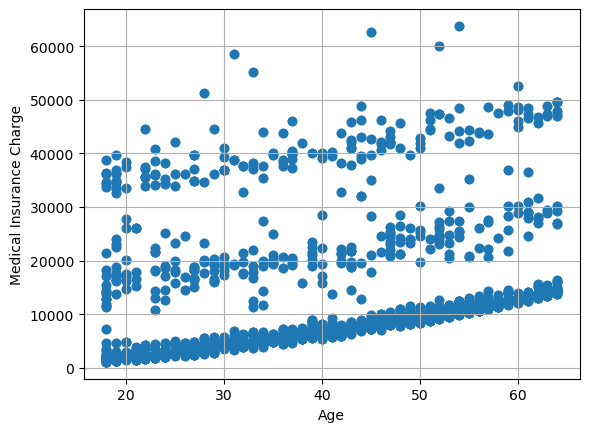

In [6]:
plt.scatter(insurance_raw['age'], insurance_raw['charges'])
plt.xlabel('Age')
plt.ylabel('Medical Insurance Charge')
plt.grid()
plt.show()

We can see that it seems that there are 3 clusters of points. A clear line can be seen at the bottom of the dataset, consisting of assuming to be healthy individuals since they have the lowest charges. Then there's an unhealthier group, with their line in the middle, and an ever unhealthier group, with their line at the top. But the general trend can be seen that as age increases, charges increase.

### BMI

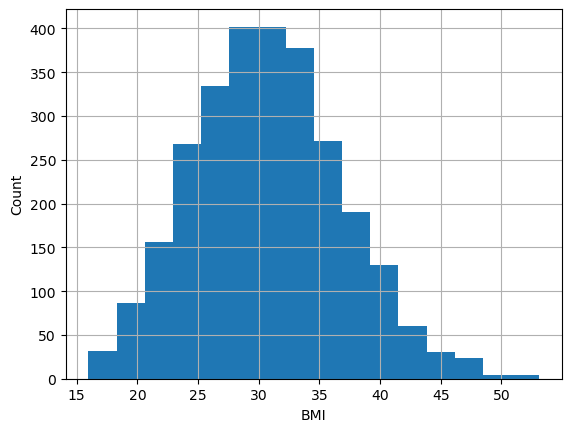

In [7]:
plt.hist(insurance_raw['bmi'], bins=16)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.grid()
plt.show()

The BMI's of our dataset is approximately Normally distributed. Thus our model should not overfit to a certain group. Since it represents people from all BMI levels,  it could be used to make predictions from people of all BMI levels.

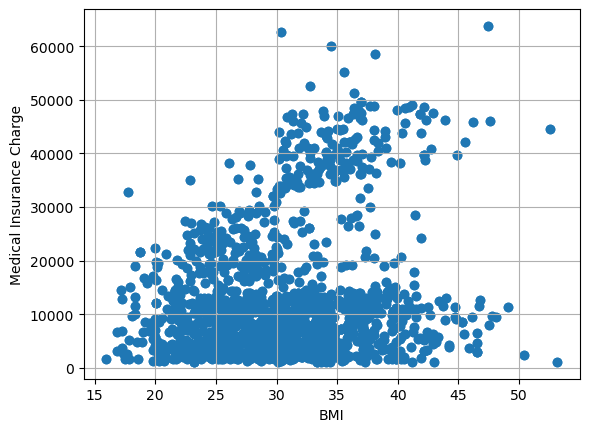

In [8]:
plt.scatter(insurance_raw['bmi'], insurance_raw['charges'])
plt.xlabel('BMI')
plt.ylabel('Medical Insurance Charge')
plt.grid()
plt.show()

There seems to be no linear relationship between BMI and medical insurance charges. For some of the dataset, it looks like there's a positive linear assocation between the two, but for the rest of it there's no association.

### Sex

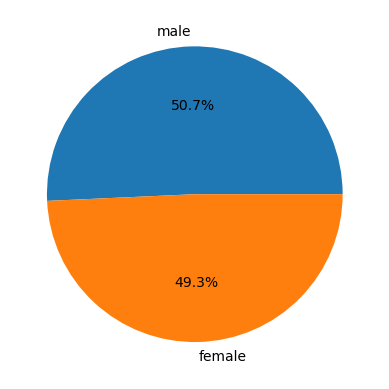

In [9]:
sex_counts = insurance_raw['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.show()

There's approximately an equal amount of male and females in the dataset, so our model should be able to make predictions for both sexes.

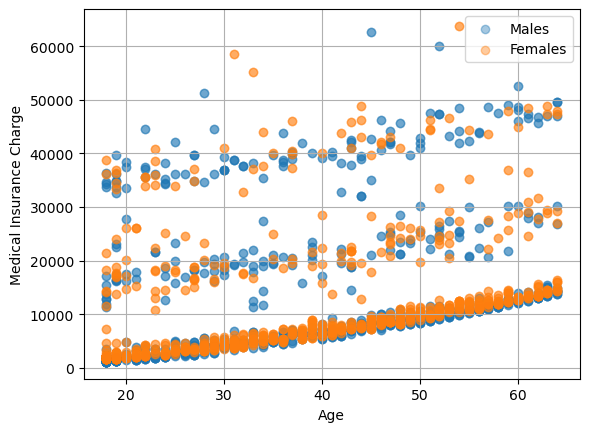

In [10]:
males = insurance_raw[insurance_raw['sex'] == 'male']
females = insurance_raw[insurance_raw['sex'] == 'female']
plt.scatter(males['age'], males['charges'], label='Males', alpha=0.4)
plt.scatter(females['age'], females['charges'], label='Females', alpha=0.4)
plt.xlabel('Age')
plt.ylabel('Medical Insurance Charge')
plt.grid()
plt.legend()
plt.show()

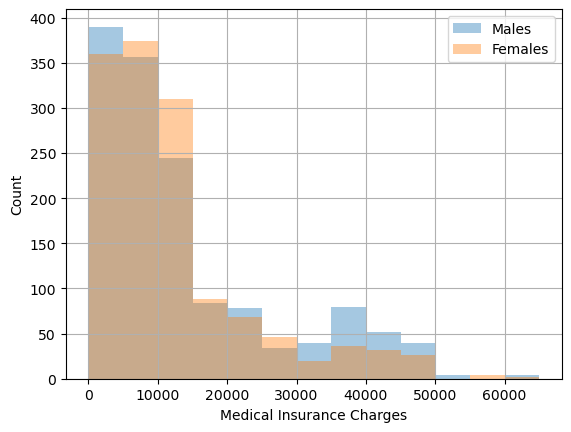

In [11]:
plt.hist(males['charges'], label='Males', alpha=0.4, bins=np.arange(0, 70000, 5000))
plt.hist(females['charges'], label='Females', alpha=0.4, bins=np.arange(0, 70000, 5000))
plt.xlabel('Medical Insurance Charges')
plt.ylabel('Count')
plt.grid()
plt.legend()
plt.show()

If we separate our dataset into males and females, and then compare age with medical insurance charges, it appears gender has no effect on the charges.

### Children

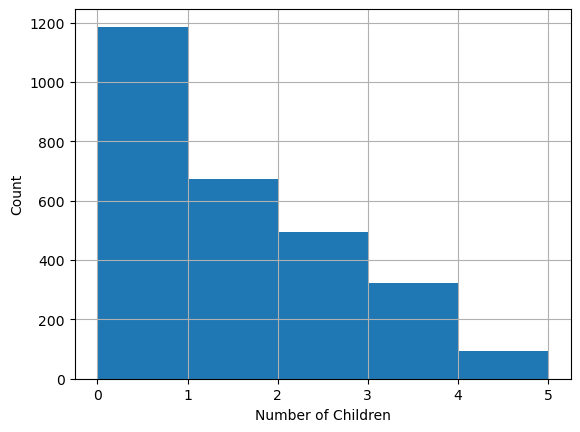

In [12]:
plt.hist(insurance_raw['children'], bins=np.arange(0, 6, 1))
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.grid()
plt.show()

Our dataset represents people with different types of children, so should be accurate in given predictions with such. However for making predictions for people with more children, it may be less accurate since our training data is right skewed. However this reflects the reality of the population.

### Smoker

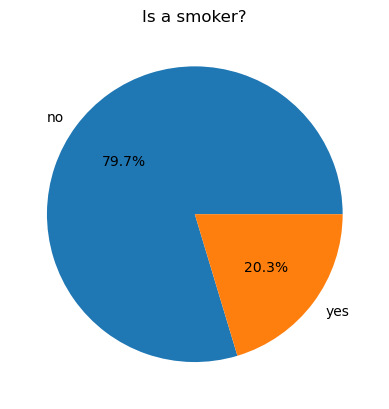

In [13]:
smoker_counts = insurance_raw['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Is a smoker?')
plt.show()

There are enough smokers and non-smokers in our dataset to which our model will be accurate for both.

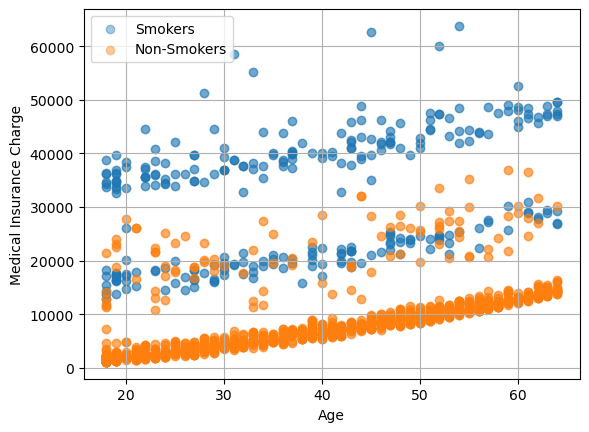

In [14]:
smokers = insurance_raw[insurance_raw['smoker'] == 'yes']
non_smokers = insurance_raw[insurance_raw['smoker'] == 'no']

plt.scatter(smokers['age'], smokers['charges'], label='Smokers', alpha=0.4)
plt.scatter(non_smokers['age'], non_smokers['charges'], label='Non-Smokers', alpha=0.4)
plt.xlabel('Age')
plt.ylabel('Medical Insurance Charge')
plt.grid()
plt.legend()
plt.show()

It also appears that most of the non-smokers are on the orange line at the bottom, and the smokers are at the top. It appears non-smokers have much lower medical insurance charges than smokers.

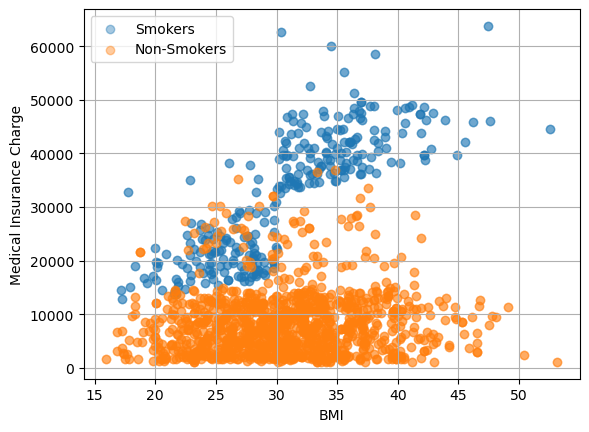

In [15]:
plt.scatter(smokers['bmi'], smokers['charges'], label='Smokers', alpha=0.4)
plt.scatter(non_smokers['bmi'], non_smokers['charges'], label='Non-Smokers', alpha=0.4)
plt.xlabel('BMI')
plt.ylabel('Medical Insurance Charge')
plt.grid()
plt.legend()
plt.show()

Dividing the Charge vs BMI scatter plot into smokers and non-smokers seems to explain the trend we saw earlier in the Charge vs BMI scatter plot, where there appeared to be 2 separate trends going on.

It appears for non-smokers that there's no associations between BMI and charges, but for smokers there's a positive, linear association between BMI and charges.

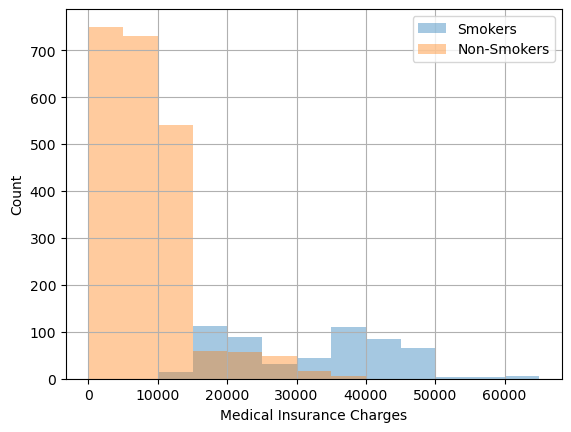

In [16]:
plt.hist(smokers['charges'], label='Smokers', alpha=0.4, bins=np.arange(0, 70000, 5000))
plt.hist(non_smokers['charges'], label='Non-Smokers', alpha=0.4, bins=np.arange(0, 70000, 5000))
plt.xlabel('Medical Insurance Charges')
plt.ylabel('Count')
plt.grid()
plt.legend()
plt.show()

In [17]:
smoker_mean_charges = smokers['charges'].mean()
nonsmoker_mean_charges = non_smokers['charges'].mean()

print(f"Mean medical insurance charges for smokers is ${smoker_mean_charges}")
print(f"Mean medical insurance charges for non smokers is ${nonsmoker_mean_charges}")

Mean medical insurance charges for smokers is $32223.139763617022
Mean medical insurance charges for non smokers is $8417.8744111404


This reinforces that the smokers tend to have much higher medical insurance charges than non-smokers.

### Region

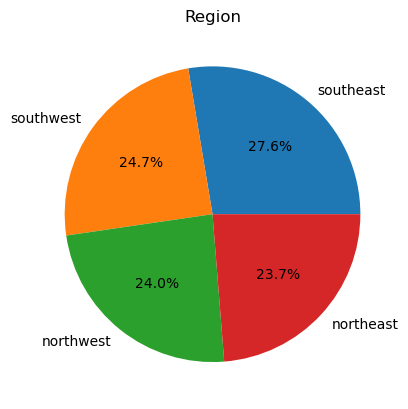

In [18]:
region_counts = insurance_raw['region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Region')
plt.show()

There's about an equal number of people in each region, so our model should be accurate for all regions.

## **Hypothesis Test**

It's very clear that smoking has an effect on medical insurance charges, but it's less clear whether or not BMI has an effect. We will conduct a hypothesis test to find out.

Null hypothesis: BMI has no impact on medical insurance charges.
Alternative hypothesis: BMI has an impact on medical insurance charges.

## **Base Model**


### Feature Engineering

We first split our data into a training and test set, as standard.

Then, we will need to convert the 'sex', 'smoker', and 'region' features into quantitative features for our model to work. We will use one-hot encoding for this. \

Rest numerical features are standardized, allowing us to directly compare the weights to determine the most important feature.

In [19]:
X = insurance_raw.drop('charges', axis=1)
y = insurance_raw['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

preproc = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first'), categorical_features),
    ('standardize', StandardScaler(), numerical_features)
])

base_model = make_pipeline(preproc, LinearRegression())

base_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('linearregression', LinearRegression())])

In [20]:
R_squared_base = base_model.score(X_test, y_test)
R_squared_base

0.7491863542166446

In [21]:
RMSE_base = mean_squared_error(y_test, base_model.predict(X_test), squared=False)
RMSE_base

6116.856970842271

### Base Model Analysis

Our R^2 for this model is 0.75, and the RMSE is 6117. This means that our model is pretty accurate in making predictions, but there's still room for improvement.

We will now look at the coefficients of our model to determine what the most important features to our predictions are.

In [22]:
ohe_feature_names = preproc.named_transformers_['ohe'].get_feature_names_out()
all_feature_names = ohe_feature_names.tolist() + numerical_features
coefficients = base_model.named_steps['linearregression'].coef_

feature_coefficients_base = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})
feature_coefficients_base

,Feature,Coefficient
0,sex_male,-134.049489
1,smoker_yes,23931.403634
2,region_northwest,-180.195381
3,region_southeast,-1086.968420
4,region_southwest,-1048.508979
5,age,3566.968820
6,bmi,2054.888973
7,children,653.726391


Since our features are standardized and one-hot encoded, we can simply look at the absolute values of the coefficients to determine which features have the most weight on our model.

It appears **being a smoker has by far the most impact on medical insurance charges**. Holding all else constant, being a smoker will lead to a **$23,931.40 increase in predicted medical insurance charges**, all else held constant. It is then followed by age, and BMI as the second and third most important factors.

Our explanatory data analysis was correct. It seems sex has very little (if any) impact on medical insurance charges.

## **Final Model**

Using our results from the previous model, along with hyperparameter tuning and cross-validation to engineer the best possible features, we will create a new, final model to answer our questions.

### Further Feature Selection: What to Drop

We will test different feature combinations using 5-fold cross validation.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

pipes = {
    'base': make_pipeline(
        make_column_transformer(
            (OneHotEncoder(drop='first'), categorical_features),
            remainder='passthrough'),
        LinearRegression()
    ),
    'sex dropped': make_pipeline(
        make_column_transformer(
            (OneHotEncoder(drop='first'), ['smoker', 'region']),
            ('drop', ['sex']),
            remainder='passthrough'),
        LinearRegression()
    ),
    'region dropped': make_pipeline(
        make_column_transformer(
            (OneHotEncoder(drop='first'), ['smoker', 'sex']),
            ('drop', ['region']),
            remainder='passthrough'),
        LinearRegression()
    ),
    'children dropped': make_pipeline(
        make_column_transformer(
            (OneHotEncoder(drop='first'), categorical_features),
            ('drop', ['children']),
            remainder='passthrough'),
        LinearRegression()
    ),
    'region and sex dropped': make_pipeline(
        make_column_transformer(
            ('drop', ['region', 'sex']),
            (OneHotEncoder(drop='first'), ['smoker']),
            remainder='passthrough'),
        LinearRegression()
    )
}

feature_errors = pd.DataFrame()
for pipe in pipes:
    errors = cross_val_score(pipes[pipe], X_train, y_train, scoring='neg_root_mean_squared_error')
    feature_errors[pipe] = -errors

feature_errors.mean()

base                      6082.660233
sex dropped               6079.492842
region dropped            6085.838301
children dropped          6117.038128
region and sex dropped    6083.075515
dtype: float64

We can see that the RMSE is very similar for all of the combinations, except when children is dropped, it increases. Thus for simplicity of our model, we will drop both sex and region. But we will keep children to keep our model performance up.

Age and BMI were not tested to be dropped because they had higher coefficients in our base model, meaning that they held some importance for our predictions.

In [24]:
X = X.drop(columns=['region', 'sex'])
X.head()

,age,bmi,children,smoker
0,19,27.900,0,yes
1,18,33.770,1,no
2,28,33.000,3,no
3,33,22.705,0,no
4,32,28.880,0,no


### Further Feature Selection: Modifying the Children Feature

The specific number of children may not exactly matter. We can use categorizations to group our sample into different groups.

- Base Method: use number of children as the feature
- Method A: no children (0 children), children (1 or more children); we can use SKLearn's Binarizer class here
- Method B: no children (0 children), 1 child (1 child), multiple children (2 or more children)

We will test all below, again using 5-fold cross validation.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

def methodB(children):
    if children == 0:
        return 0
    if children == 1:
        return 1
    return 2


pipes = {
    'base': make_pipeline(
        make_column_transformer(
            (OneHotEncoder(drop='first'), ['smoker']),
            remainder='passthrough'
        ),
        LinearRegression()
    ),
    'method A': make_pipeline(
        make_column_transformer(
            (OneHotEncoder(drop='first'), ['smoker']),
            (Binarizer(threshold=0.5), ['children']),
            (FunctionTransformer(lambda x: x), ['age', 'bmi'])
        ),
        LinearRegression()
    ),
    'method B': make_pipeline(
        make_column_transformer(
            (OneHotEncoder(drop='first'), ['smoker']),
            (FunctionTransformer(func=np.vectorize(methodB)), ['children']),
            (FunctionTransformer(lambda x: x), ['age', 'bmi'])
        ),
        LinearRegression()
    )
}

children_errors = pd.DataFrame()
for pipe in pipes:
    errors = cross_val_score(pipes[pipe], X_train, y_train, scoring='neg_root_mean_squared_error')
    children_errors[pipe] = -errors

children_errors.mean()

base        6083.075515
method A    6100.067647
method B    6084.256621
dtype: float64

Again, the RMSE is very similar for the base model and method B model. This is because method B and the base are almost identical, since people with 0 or 1 children (most of the sample) remain in groups by themselves for both groups. So for simplicity we will leave the child feature as is in our model.

### Different Models for Smokers and Non-Smokers

From our scatter plot earlier (also seen below), we can see that there's 2 different associations between BMI and medical insurance charges, one for smokers and one for non smokers. Thus we will train 2 different models to so that they can effectively capture these associations.

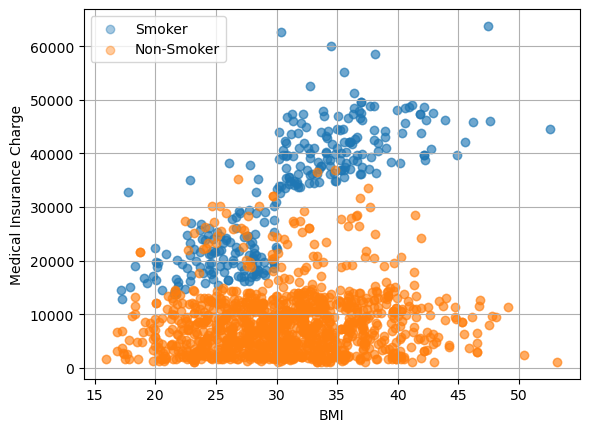

In [26]:
plt.scatter(smokers['bmi'], smokers['charges'], label='Smoker', alpha=0.4)
plt.scatter(non_smokers['bmi'], non_smokers['charges'], label='Non-Smoker', alpha=0.4)
plt.xlabel('BMI')
plt.ylabel('Medical Insurance Charge')
plt.grid()
plt.legend()
plt.show()

### Smokers Model

We will test different hyperparameters for the smoker model below. We will test all combinations of powers of age, BMI, and children from 1-4.

In [27]:
X_smokers = X[X['smoker'] == 'yes']
y_smokers = smokers['charges']

X_train_smokers, X_test_smokers, y_train_smokers, y_test_smokers = train_test_split(X_smokers, y_smokers, test_size=0.2, random_state=14)

smoker_hyperparameter_errors = pd.DataFrame()
for a in np.arange(1, 5):
    for b in np.arange(1, 5):
        for c in np.arange(1, 5):
            pl = make_pipeline(
                make_column_transformer(
                    (PolynomialFeatures(a), ['age']),
                    (PolynomialFeatures(b), ['bmi']),
                    (PolynomialFeatures(c), ['children'])
                ),
                LinearRegression()
            )
            errors = cross_val_score(pl, X_train_smokers, y_train_smokers, scoring='neg_root_mean_squared_error')
            smoker_hyperparameter_errors[f'age degree = {a}, BMI degree = {b}, children degree = {c}'] = -errors

In [28]:
smoker_hyperparameter_errors.mean().sort_values().iloc[:5]

age degree = 1, BMI degree = 4, children degree = 3    4788.292950
age degree = 2, BMI degree = 4, children degree = 3    4789.589125
age degree = 1, BMI degree = 4, children degree = 4    4795.067267
age degree = 2, BMI degree = 4, children degree = 4    4796.432315
age degree = 3, BMI degree = 4, children degree = 3    4804.230622
dtype: float64

We can see that RMSE is minimized when the **degree of the age feature is 1, degree of the BMI feature is 4, and degree of children feature is 3**.

We will now retrain the smoker model on the entire smoker dataset, and later run it against the test smoker dataset to get our final R^2 and RMSE.

In [29]:
final_smokers_model = make_pipeline(
    make_column_transformer(
        (StandardScaler(), ['age', 'bmi', 'children']),
        (PolynomialFeatures(1), ['age']),
        (PolynomialFeatures(4), ['bmi']),
        (PolynomialFeatures(3), ['children']),
    ),
    LinearRegression()
)

final_smokers_model.fit(X_train_smokers, y_train_smokers)

RMSE_final_smokers = mean_squared_error(y_test_smokers, final_smokers_model.predict(X_test_smokers), squared=False)

### Non-Smokers Model

We will test different hyperparameters for the non-smoker model below. We will test all combinations of powers of age, BMI, and children from 1-4.

In [30]:
X_nonsmokers = X[X['smoker'] == 'no']
y_nonsmokers = non_smokers['charges']

X_train_nonsmokers, X_test_nonsmokers, y_train_nonsmokers, y_test_nonsmokers = train_test_split(X_nonsmokers, y_nonsmokers, test_size=0.2, random_state=14)

nonsmoker_hyperparameter_errors = pd.DataFrame()
for a in np.arange(1, 5):
    for b in np.arange(1, 5):
        for c in np.arange(1, 5):
            pl = make_pipeline(
                make_column_transformer(
                    (PolynomialFeatures(a), ['age']),
                    (PolynomialFeatures(b), ['bmi']),
                    (PolynomialFeatures(c), ['children'])
                ),
                LinearRegression()
            )
            errors = cross_val_score(pl, X_train_nonsmokers, y_train_nonsmokers, scoring='neg_root_mean_squared_error')
            nonsmoker_hyperparameter_errors[f'age degree = {a}, BMI degree = {b}, children degree = {c}'] = -errors

In [31]:
nonsmoker_hyperparameter_errors.mean().sort_values().iloc[:5]

age degree = 4, BMI degree = 3, children degree = 2    4440.297600
age degree = 4, BMI degree = 2, children degree = 2    4440.660727
age degree = 4, BMI degree = 4, children degree = 2    4443.228075
age degree = 4, BMI degree = 3, children degree = 3    4444.898094
age degree = 4, BMI degree = 2, children degree = 3    4445.065106
dtype: float64

We can see that RMSE is minimized when the **degree of the age feature is 4, degree of the BMI feature is 2, and degree of children feature is 2**.

*Note we chose 2 instead of 3 for the degree of BMI since the difference is very small, and degree 2 makes our model simpler and faster.

We will now retrain the non-smoker model on the entire non-smoker dataset, and later run it against the test non-smoker dataset to get our final  RMSE.

In [32]:
final_nonsmokers_model = make_pipeline(
    make_column_transformer(
        (StandardScaler(), ['age', 'bmi', 'children']),
        (PolynomialFeatures(4), ['age']),
        (PolynomialFeatures(2), ['bmi']),
        (PolynomialFeatures(2), ['children']),
    ),
    LinearRegression()
)

final_nonsmokers_model.fit(X_train_nonsmokers, y_train_nonsmokers)

RMSE_final_nonsmokers = mean_squared_error(y_test_nonsmokers, final_nonsmokers_model.predict(X_test_nonsmokers), squared=False)

### Final Model Analysis/Comparison

We will now compare our 2 final models to our original base model to see the difference.

In [33]:
all_RMSE = [RMSE_base] + [RMSE_final_smokers] + [RMSE_final_nonsmokers]

analysis = pd.DataFrame({
    'RMSE': all_RMSE
})
analysis.index = ['base model', 'final smoker model', 'final non-smoker model']
analysis

,RMSE
base model,6116.856971
final smoker model,5298.886482
final non-smoker model,5125.019659


We can see that our final smoker and final non-smoker models perform much better than our base model. It was a good idea to drop unnecessary features and separate the base model into 2 distinct models depending on smoker status.

## **Conclusion**

The questions posed at the beginning of this project:

1. Which features influence medical costs the most?
2. How accurately machine learning models predict medical insurance charges?

**New questions** asked during this process:

3. How can medical insurance companies use this to help their business?
4. What additional data can be collected by these companies to increase model accuracy?

**Insights:**

Smoking is by far the most important factor to consider when predicting someone's medical insurance charges. After smoking, the most important factors in order (most to least important) are: age, BMI, and number of children. BMI is a more relevant factor to our predictions for smokers than for non-smokers. We found that someone's sex and region they live in were not relevant to our prediction.

Machine learning can predict someone's medical insurance charges based on our selected features moderately accurately. Our final models had RMSEs of 5298 and 5125. When considering how large the medical insurance bills are, this is moderately accurate.

A medical insurance company could use this information by (according to ChatGPT) :
1. Personalized Pricing: Calculate premiums more accurately based on individual factors like smoking status, age, BMI, and number of children, leading to fairer pricing and reduced risk.
2. Risk Management: Improve underwriting by predicting future medical costs, identifying high-risk individuals, and managing risks more effectively.
3. Customer Segmentation: Tailor marketing strategies and insurance plans to different customer segments based on predicted charges and health profiles.
4. Behavioral Incentives: Encourage healthier behaviors among policyholders by educating them about factors influencing insurance charges, like smoking and BMI.
5. Fraud Detection: Use predictive analytics to detect and prevent fraudulent claims by comparing actual claims with predicted charges.
6. Innovation: Develop new insurance products that better meet the needs of different customer groups, enhancing competitiveness and compliance with regulatory standards.

Some other data that could be collected to improve model accuracy is alcohol consumption, medical history, exercise habits, and more. We can also further divide the 'smoker' category into varying levels of how often the person smokes.

**Thank you for reading my analysis!** This was my first major independent (not school assigned) machine learning project, so please let me know if you have any feedback suchit.bhayani@gmail.com :)